In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # plotting library
import datetime as dt # datetime library

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv


In [3]:
df = pd.read_csv('/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv')
df = df.set_index('Country Name')
df


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,253.544574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,1.104632,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
Afghanistan,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,0.086510,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
Africa Western and Central,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,0.202129,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
Angola,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,0.480199,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,0.017023,0.017380,0.021384,0.022253,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
South Africa,5.727223,5.832621,5.887168,5.961337,6.332343,6.616545,6.453858,6.560824,6.593620,6.665435,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645


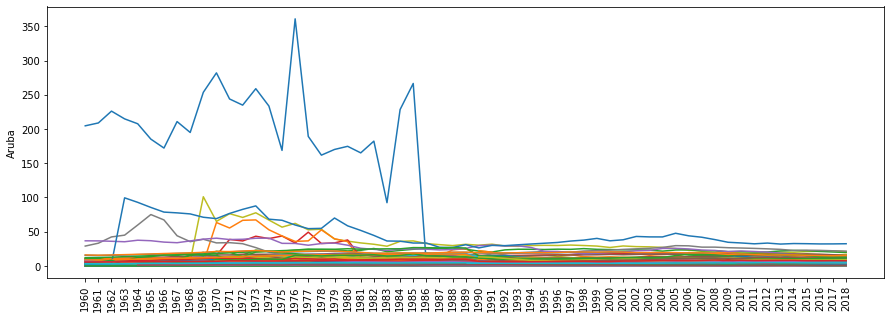

In [4]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
countries = df.index
for country in countries:
    sns.lineplot(x=df.loc[country].index,y=df.loc[country])


In [5]:
df_stack = pd.DataFrame(df.stack()).reset_index()
df_stack = df_stack.rename(columns={'Country Name':'Country Name','level_1':'Year',0:'CO2emissions'})
df_stack['Year'] = pd.to_numeric(df_stack['Year'],errors='coerce')
df_stack

,Country Name,Year,CO2emissions
0,Aruba,1960,204.631696
1,Aruba,1961,208.837879
2,Aruba,1962,226.081890
3,Aruba,1963,214.785217
4,Aruba,1964,207.626699
...,...,...,...
13337,Zimbabwe,2014,0.894256
13338,Zimbabwe,2015,0.897598
13339,Zimbabwe,2016,0.783303
13340,Zimbabwe,2017,0.718570


Data Observations

In [6]:
len(df_stack['Country Name'].unique())


250

Missing values

<AxesSubplot:ylabel='Country Name'>

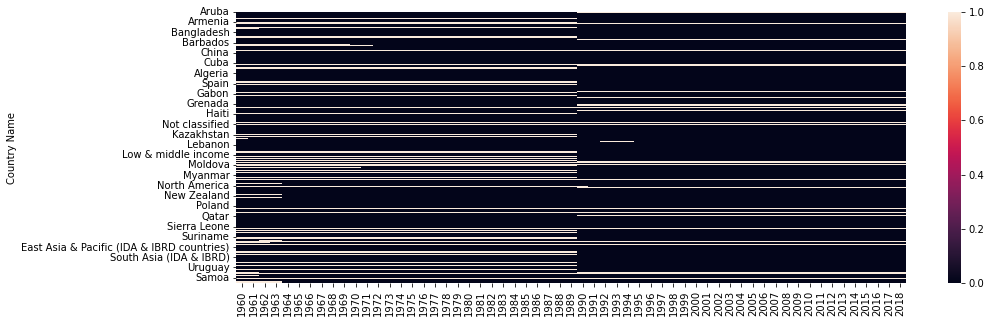

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())


Exploratory Data Analysis
Largest Average CO2 Emitters Per Capita


<AxesSubplot:xlabel='CO2emissions', ylabel='Country Name'>

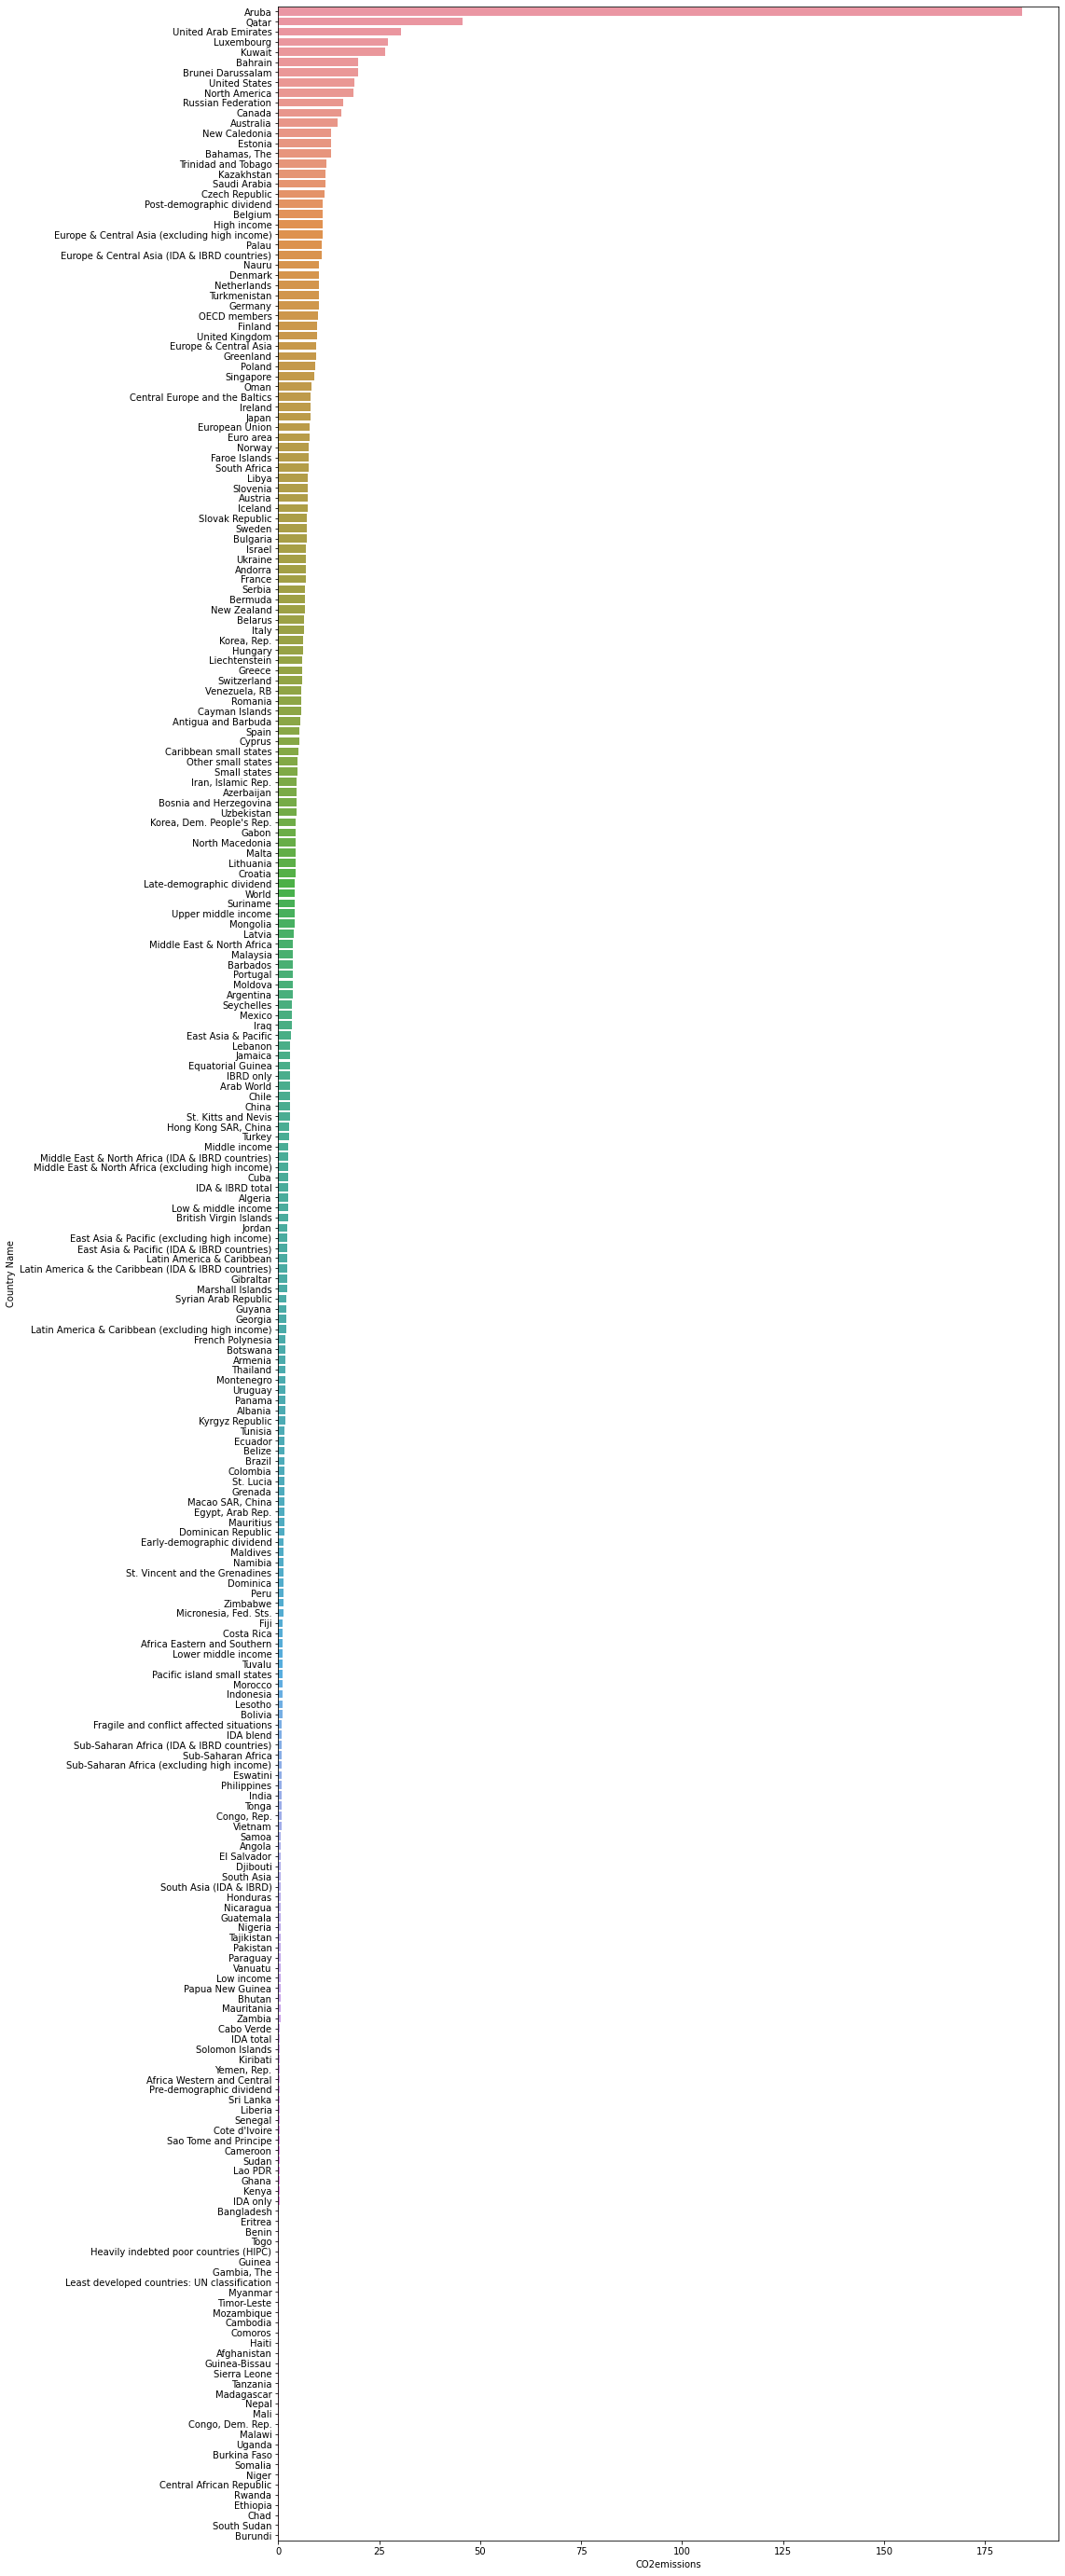

In [8]:
df_plot = df_stack.groupby(by=['Country Name']).mean().sort_values(by=['CO2emissions'],ascending=False)
plt.figure(figsize=(15,50))
sns.barplot(y=df_plot.index,x=df_plot['CO2emissions'])


Largest CO2 Emitters Per Capita over the past 10 years


<AxesSubplot:xlabel='Country Name', ylabel='CO2emissions'>

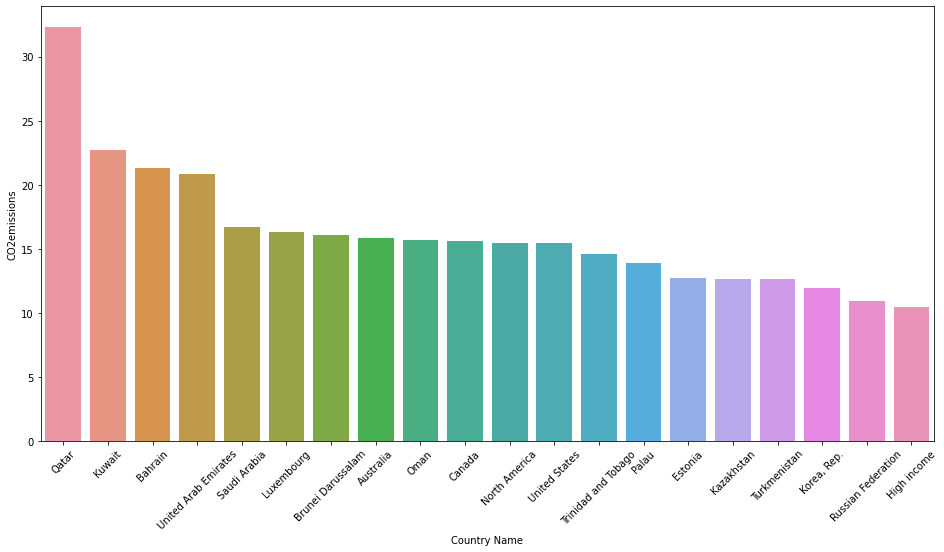

In [9]:
year = dt.datetime.today().year
delta_years = 10
df_plot = df_stack[df_stack['Year']>(year-delta_years)].groupby(by=['Country Name']).mean().sort_values(by='CO2emissions',ascending=False).iloc[:20]
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x=df_plot.index,y=df_plot['CO2emissions'])


Average CO2 Emissions per Capita Over Time

<AxesSubplot:xlabel='Year', ylabel='CO2emissions'>

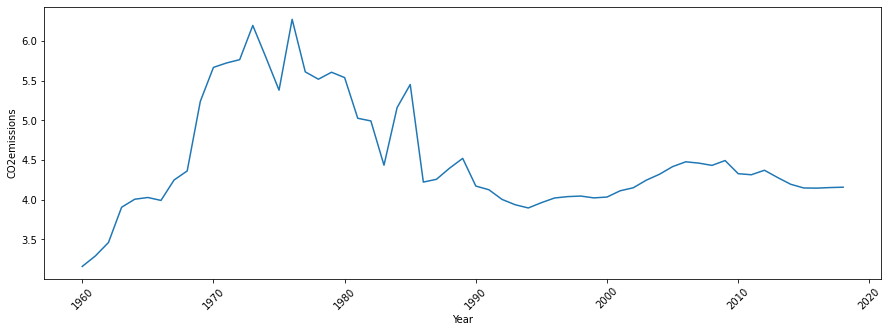

In [10]:
df_plot = df_stack.groupby(by=['Year']).mean().sort_values(by=['CO2emissions'],ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.lineplot(x=df_plot.index,y=df_plot['CO2emissions'])


CO2 Emissions per Capita Over Time - Country Independent

<AxesSubplot:title={'center':'China CO2 Emissions per Capita Over Time'}, xlabel='Year', ylabel='CO2emissions'>

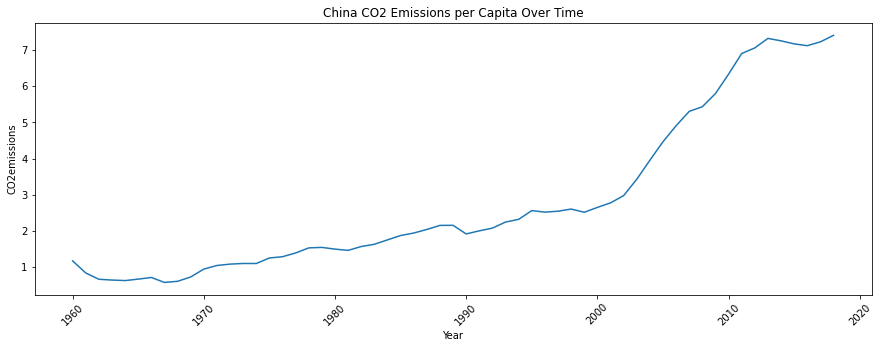

In [11]:
country = 'China'
df_plot = df_stack[df_stack['Country Name']==country].groupby(by=['Year']).mean().sort_values(by=['CO2emissions'],ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.title(f"{country} CO2 Emissions per Capita Over Time")
sns.lineplot(x=df_plot.index,y=df_plot['CO2emissions'])


From the data visualizations abbve, we are able to observe the following insights:

CO2 emissions rates are not distributed equally around the world
Large CO2 emitting countries (per capita) emit significantly more CO2 than lower emitter countries
Overall CO2 emissions have decreased from its peak in 1976
Overall CO2 emissions have stabilized and has recently been on the decline since 2006 in the recent years
The top CO2 emissions contributors appear to be mostly from middle eastern countries, followed by North American countries, and then eastern European countries.